In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#One hot Encoding
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
for col in ['Geography_Germany', 'Geography_Spain', 'Gender_Male']:  # Replace with your actual dummy column names
    df[col] = df[col].astype(int)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
#Scale the data
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Exited'])
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
print(X_train.shape)
print(y_train.shape)

(8000, 11)
(8000,)


In [18]:
# Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [19]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
history = model.fit(X_train_scaled,y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6997 - loss: 0.6095 - val_accuracy: 0.8037 - val_loss: 0.4660
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.4279 - val_accuracy: 0.8150 - val_loss: 0.4245
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8337 - loss: 0.4099 - val_accuracy: 0.8306 - val_loss: 0.4052
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8470 - loss: 0.3909 - val_accuracy: 0.8325 - val_loss: 0.3895
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8389 - loss: 0.3860 - val_accuracy: 0.8400 - val_loss: 0.3797
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.3766 - val_accuracy: 0.8469 - val_loss: 0.3687
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8591 - loss: 0.3629 - val_accuracy: 0.8487 - val_loss: 0.3604
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8559 - loss: 0.3656 - val_accu

In [25]:
model.layers[0].get_weights()

[array([[ 0.07664617, -0.0388188 , -0.00942927,  0.07871081,  0.0037538 ,
         -0.03462911, -0.5522528 ,  0.12278054,  0.05489572,  0.63875157,
          0.03796046],
        [-0.45984098, -0.7300566 ,  0.46584368,  0.4008484 ,  0.911291  ,
         -0.21569455,  0.1624527 , -0.46114764, -0.36951652,  0.10986932,
          0.7939944 ],
        [-0.13893825,  0.16379508,  0.04168275,  0.07473205,  0.14644241,
          0.01988748,  0.31552282, -0.17700166,  0.2906617 , -0.4188658 ,
         -0.1609007 ],
        [ 0.25237888,  0.00561959, -0.18108933, -0.25903547, -0.3695401 ,
         -1.0617323 , -0.63033676, -0.05168415,  0.06811175, -0.32893676,
          0.20886245],
        [ 0.15650745,  0.95800215, -1.1582824 ,  0.93649447,  0.10028118,
         -0.28575298, -0.07853281,  0.13109325,  0.04422097,  0.38484052,
          0.7833737 ],
        [-0.6584082 , -0.15553091, -0.10829321,  0.06469128, -0.01796939,
         -0.58680737, -0.3261754 , -0.1520886 ,  0.69158363, -0.2060558

In [26]:
model.layers[1].get_weights()

[array([[ 0.23404905, -0.04695098,  0.26858404, -0.07371674, -0.5821572 ,
         -0.03060133,  0.3445886 , -0.5566997 , -0.8836152 , -0.22150472,
         -1.0553029 ],
        [ 0.18539858, -0.12316451,  0.40658602, -0.01131607,  0.5344466 ,
          0.61473185, -0.7799534 , -0.15533532, -0.7760455 , -1.1718534 ,
          0.32351327],
        [-0.00462188, -0.21961553,  0.57205725, -0.57219416,  0.6810584 ,
         -0.37322313, -0.13589166,  0.12354416,  0.60911316,  0.06277139,
          0.16509375],
        [ 0.0350494 ,  0.32982507,  0.79521275,  0.29731616,  0.39277828,
          0.3937292 , -0.3196259 , -0.3555973 , -0.09800366,  0.12586786,
         -0.2764142 ],
        [-0.6028686 ,  0.5970955 , -0.381669  , -0.49631333, -0.3758839 ,
          0.11076582, -0.476748  ,  1.0570645 , -0.28895238,  0.50320166,
          0.7728132 ],
        [ 0.05365838,  0.5437962 , -0.5672897 , -0.27506837, -0.15645505,
         -0.95850885,  0.2228668 , -0.34647104,  0.62083125,  0.2743527

In [27]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.02977777],
       [0.11148578],
       [0.0312065 ],
       ...,
       [0.01893233],
       [0.03295171],
       [0.6366075 ]], dtype=float32)

In [28]:
y_log = model.predict(X_test_scaled)
y_pred = np.where(y_log>0.5,1,0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

Now change few parameters to increase the accuracy
- Increasing nodes from 3 to 11
- Changing activation function from sigmoid to relu
- Adding one more hidden layer
- Increasing epochs from 10 to 100
- Adding validation_split
- Accuracy increased from 0.8 to 0.86

In [30]:
import matplotlib.pyplot as plt



In [31]:
history.history

{'accuracy': [0.7635937333106995,
  0.8192187547683716,
  0.8339062333106995,
  0.842968761920929,
  0.8482812643051147,
  0.8535937666893005,
  0.8575000166893005,
  0.8603125214576721,
  0.8617187738418579,
  0.8634374737739563,
  0.8614062666893005,
  0.8621875047683716,
  0.8629687428474426,
  0.8623437285423279,
  0.86328125,
  0.86328125,
  0.8634374737739563,
  0.8646875023841858,
  0.8621875047683716,
  0.8643749952316284,
  0.8635937571525574,
  0.8657812476158142,
  0.866406261920929,
  0.8656250238418579,
  0.8667187690734863,
  0.8653125166893005,
  0.8673437237739563,
  0.8662499785423279,
  0.8662499785423279,
  0.8653125166893005,
  0.8653125166893005,
  0.8650000095367432,
  0.8687499761581421,
  0.8678125143051147,
  0.8660937547683716,
  0.8670312762260437,
  0.8678125143051147,
  0.8656250238418579,
  0.8667187690734863,
  0.8660937547683716,
  0.8676562309265137,
  0.8675000071525574,
  0.8653125166893005,
  0.867968738079071,
  0.8654687404632568,
  0.8678125143051

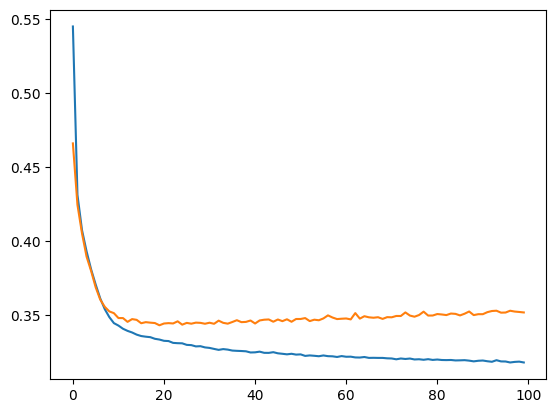

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

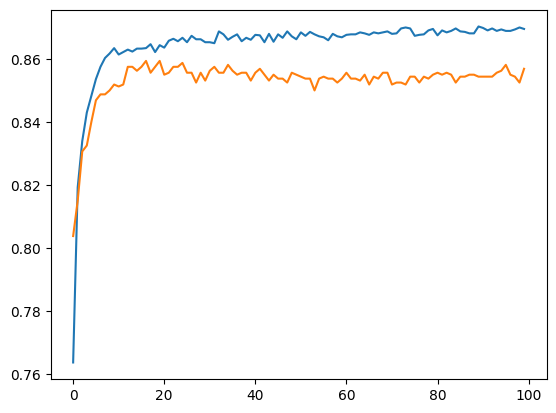

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])